# Estatística

### Conjunto Único de Dados

In [1]:
from collections import Counter
from matplotlib import pyplot as plt

In [2]:
import random

# Gerar uma lista de 1000 números inteiros aleatórios entre 1 e 100
num_friends = [random.randint(1, 100) for _ in range(300)]

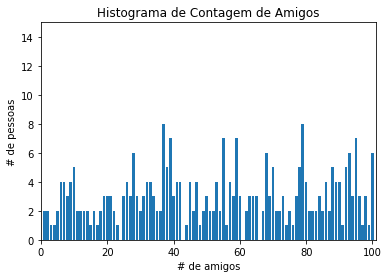

In [3]:
friends_counts = Counter(num_friends)
xs = range(101)
ys = [friends_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 15])
plt.title("Histograma de Contagem de Amigos")
plt.xlabel("# de amigos")
plt.ylabel("# de pessoas")
plt.show()

### Tendência Central

In [4]:
# média
def mean(x):
    return sum(x) / len(x)

In [5]:
mean(num_friends)

53.25333333333333

In [6]:
# mediana
def median(v):
    """Valor mais ao meio de (v)"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    # se impar, retorna valor central
    # se par, retorna média dos valores centrais
    if n % 2 == 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

In [7]:
median(num_friends)

54.0